In [1]:
cd ..

/Users/wesgurnee/Documents/mechint/sparse_probing/sparse-probing


In [2]:
import torch
import re
import numpy as np
import sklearn
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import seaborn as sns
import copy

from torch.utils.data import DataLoader
import transformer_lens
import datasets

from load import *

from analysis.load_results import (
    load_probing_experiment_results, 
    make_heuristic_probing_results_df
)

from analysis.plots import *


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:


results_dir = '/Users/wesgurnee/Documents/mechint/sparse_probing/sparse-probing/results'
sizes = ['19m', '125m', '350m', '800m', '1.3b']
all_results = []
for s in sizes:
    results_dict = load_probing_experiment_results(results_dir, 'suffix_test', 'heuristic_sparsity_sweep', f'pythia-{s}')
    rdf = make_heuristic_probing_results_df(results_dict)
    # add model size to index of rdf
    rdf.index = pd.MultiIndex.from_tuples([
        (s, *t) for t in rdf.index.values],
        names=['model_size', 'feature', 'layer', 'k']
    )
    all_results.append(rdf)
rdf = pd.concat(all_results)

In [4]:
rdf.query('k==1').sort_values('test_pr_auc', ascending=False).head(25)

test_acc test_balanced_acc  \
model_size feature                    layer k                               
800m       ends_with_('tion', 'sion') 0     1  0.953833          0.930124   
           ends_with_ful              0     1  0.979728          0.979326   
350m       ends_with_('tion', 'sion') 0     1  0.945167          0.945135   
19m        ends_with_('tion', 'sion') 0     1    0.9405          0.920382   
           ends_with_ous              0     1  0.946868          0.941943   
350m       ends_with_ful              0     1  0.963358          0.948672   
125m       ends_with_al               0     1  0.924083          0.877394   
           ends_with_('tion', 'sion') 0     1  0.924833          0.889641   
350m       ends_with_ity              0     1  0.910833          0.873787   
800m       ends_with_('tion', 'sion') 2     1  0.936083          0.889376   
                                      6     1  0.929667          0.888096   
125m       ends_with_ity              0     1  0.904583          0.872301   
800m       ends_with_ship             0     1  0.972962          0.934197   
350m       ends_with_ment             0     1  0.907333          0.875007   
800m       ends_with_ous              12    1  0.935939          0.905003   
           ends_with_al               0     1  0.928583          0.847806   
                                      8     1   0.93075          0.864534   
19m        ends_with_ment             0     1  0.916167          0.875193   
           ends_with_ous              1     1  0.926356          0.858081   
800m       ends_with_ful              10    1   0.95936          0.934877   
350m       ends_with_('tion', 'sion') 2     1   0.89475          0.856567   
19m        ends_with_al               0     1  0.917667          0.838435   
800m       ends_with_able             0     1  0.901417          0.818566   
350m       ends_with_ity              2     1  0.890583          0.859246   
800m       ends_with_less             0     1   0.95596          0.866958   

                                              test_precision test_recall  \
model_size feature                    layer k                              
800m       ends_with_('tion', 'sion') 0     1       0.883645    0.890164   
           ends_with_ful              0     1       0.819199    0.978842   
350m       ends_with_('tion', 'sion') 0     1       0.814841    0.945082   
19m        ends_with_('tion', 'sion') 0     1       0.831923    0.886475   
           ends_with_ous              0     1       0.818561    0.933881   
350m       ends_with_ful              0     1       0.721311    0.930958   
125m       ends_with_al               0     1       0.808107    0.800855   
           ends_with_('tion', 'sion') 0     1       0.805887    0.830328   
350m       ends_with_ity              0     1       0.764956    0.811298   
800m       ends_with_('tion', 'sion') 2     1       0.866404    0.810656   
                                      6     1       0.833055    0.818033   
125m       ends_with_ity              0     1       0.740549    0.817847   
800m       ends_with_ship             0     1       0.732212    0.889937   
350m       ends_with_ment             0     1       0.741887     0.82122   
800m       ends_with_ous              12    1       0.823064    0.854365   
           ends_with_al               0     1       0.897587    0.715385   
                                      8     1       0.871858    0.755983   
19m        ends_with_ment             0     1       0.780291    0.807018   
           ends_with_ous              1     1       0.856647    0.746327   
800m       ends_with_ful              10    1       0.703896    0.905345   
350m       ends_with_('tion', 'sion') 2     1       0.718855    0.792213   
19m        ends_with_al               0     1       0.844196    0.708547   
800m       ends_with_able             0     1       0.791687    0.681397   
350m       ends_with_ity              2     1       0.701068    0.8

ValueError: RGBA values should be within 0-1 range

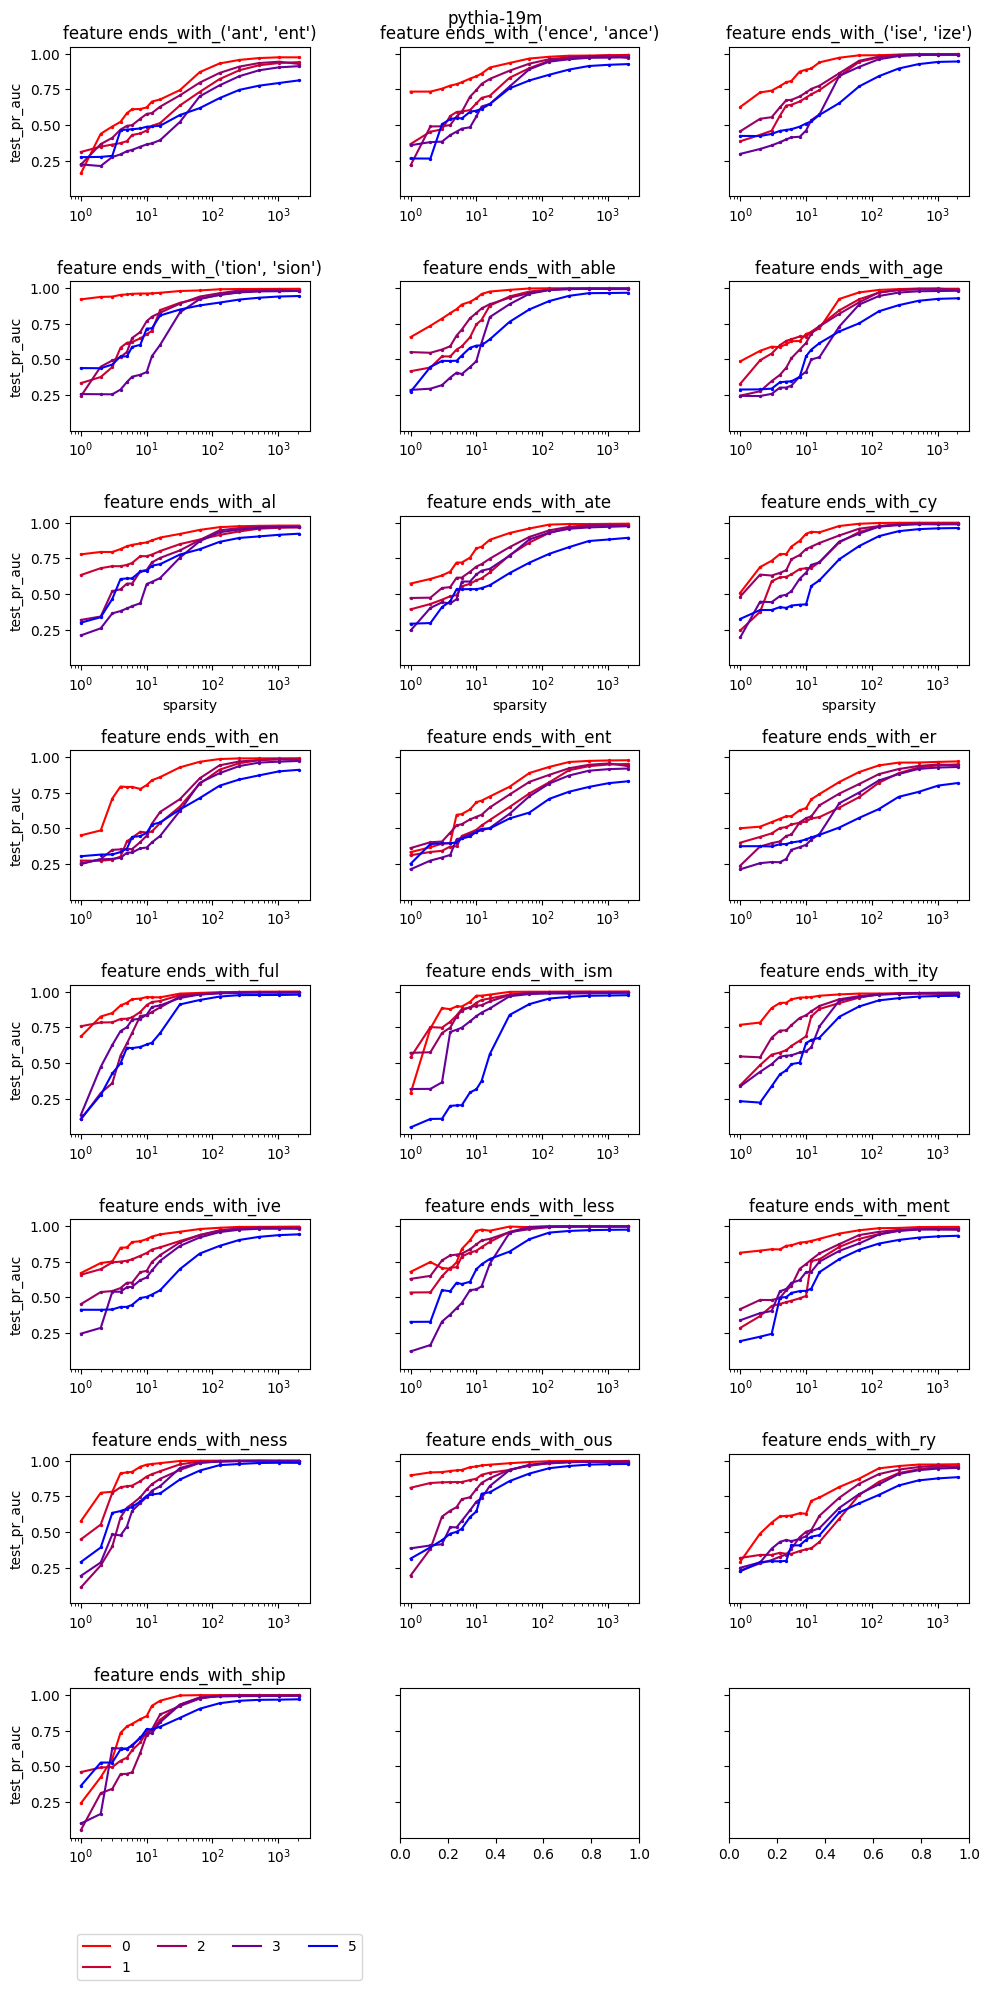

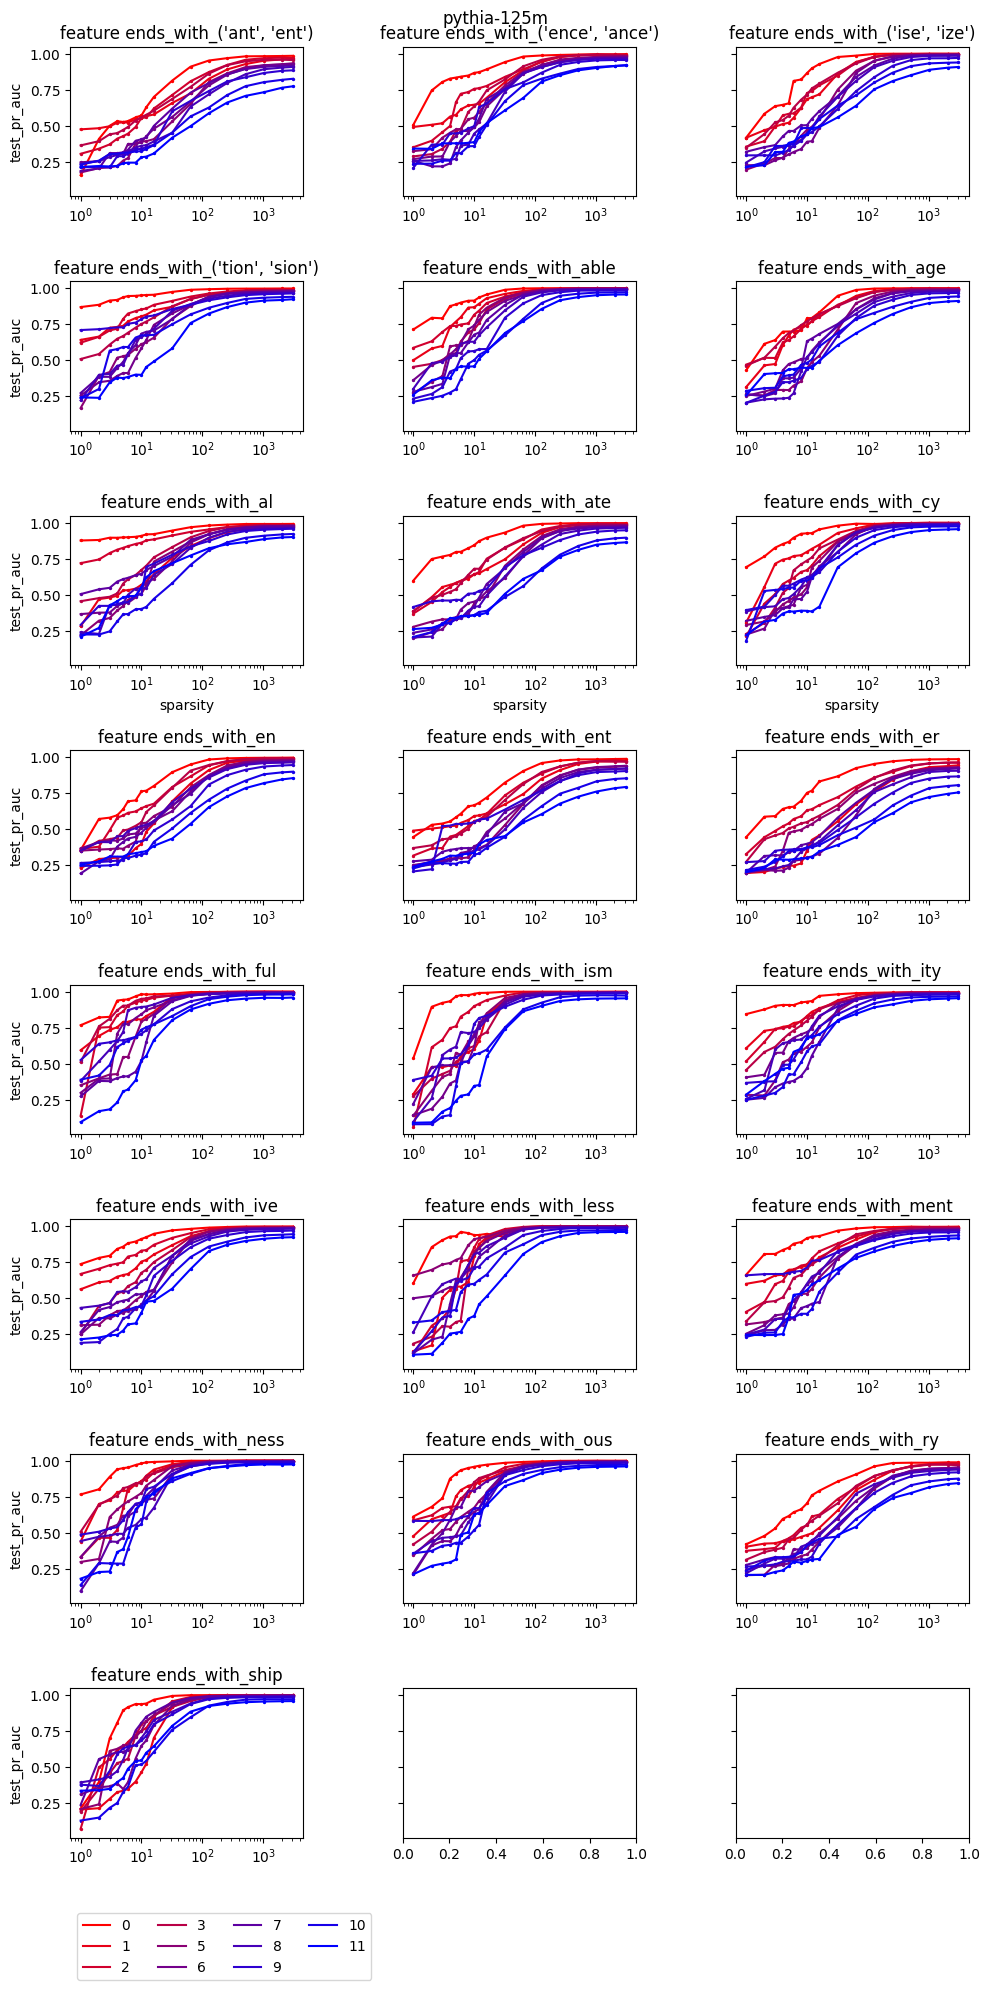

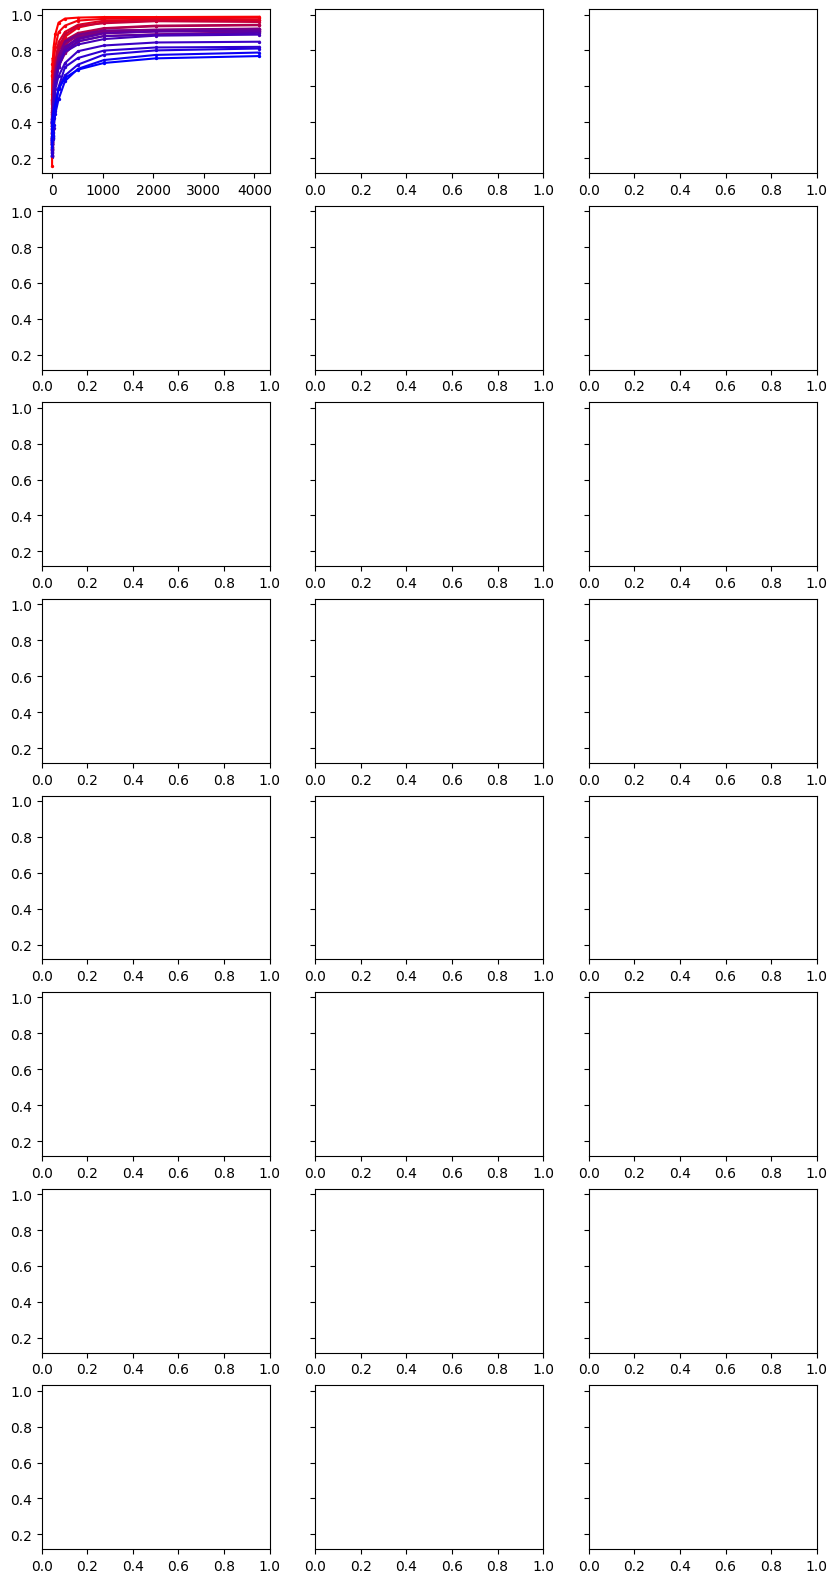

In [5]:
for s in sizes:
    plot_layer_metric_over_sparsity_per_feature(rdf.query(f'model_size=="{s}"').reset_index(level=0, drop=True), metric='test_pr_auc')
    # raise the title of the plot
    plt.suptitle(f'pythia-{s}', y=1.0)


/Users/wesgurnee/Documents/mechint/sparse_probing/sparse-probing/analysis/plots.py:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

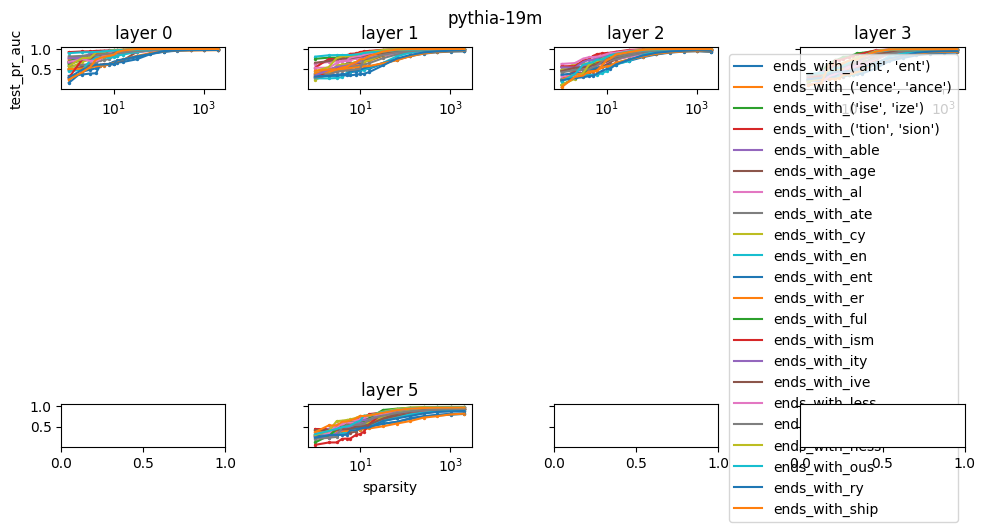

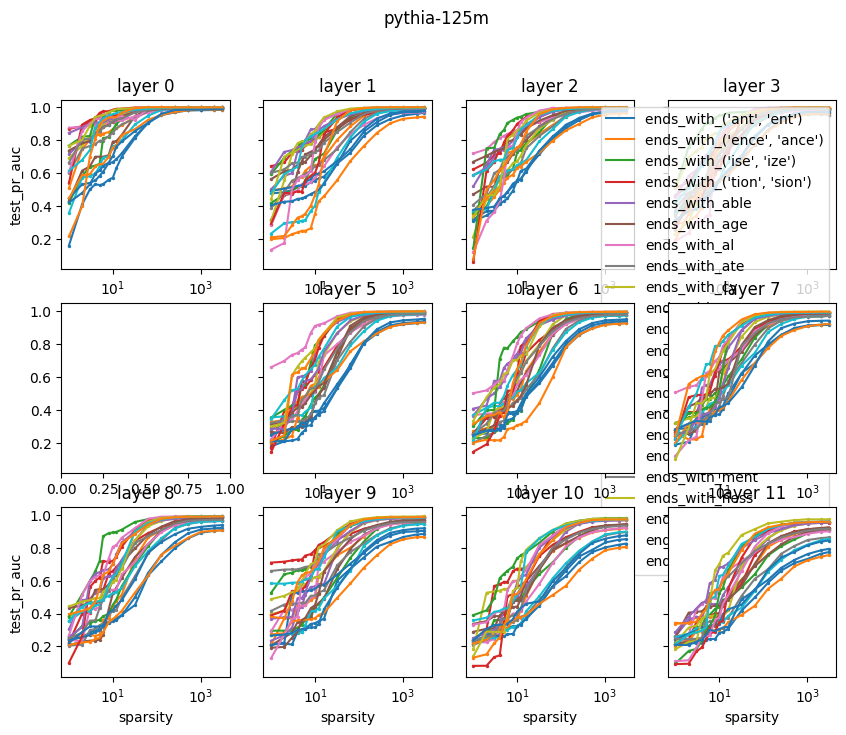

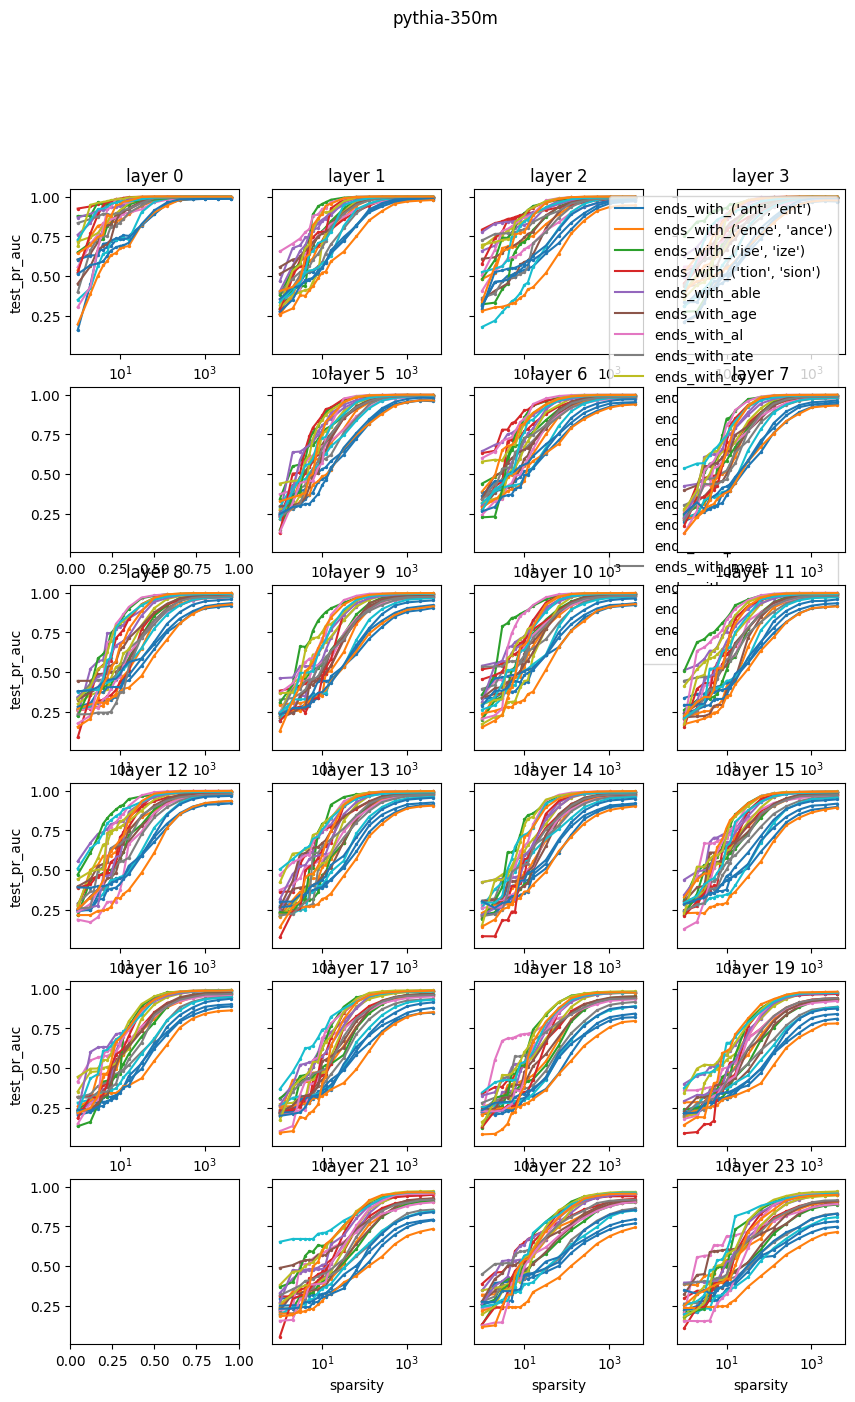

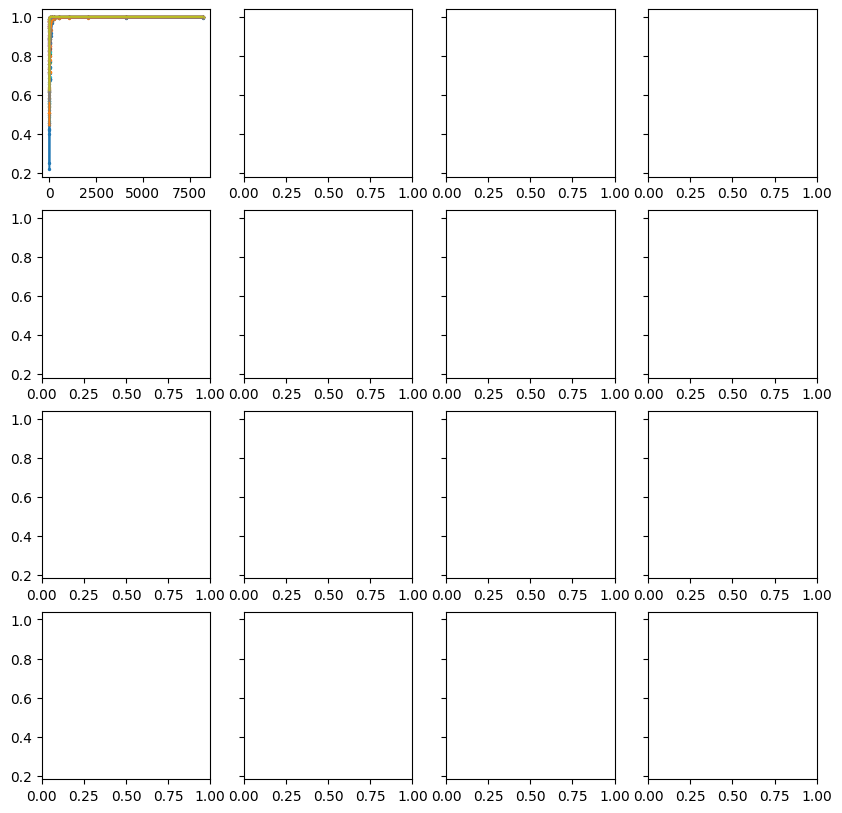

In [6]:
for s in sizes:
    plot_metric_over_sparsity_per_layer(rdf.query(f'model_size=="{s}"').reset_index(level=0, drop=True), 
    metric='test_pr_auc')
    # raise the title of the plot
    plt.suptitle(f'pythia-{s}', y=1.0)

In [9]:
one_sp.head()

NameError: name 'one_sp' is not defined

In [ ]:
n_layers = rdf.reset_index().groupby('model_size').layer.max().to_dict()

one_sp = rdf.query('k==1').sort_values('test_pr_auc', ascending=False).head(10)
# plot one_sp for each feature:
# x axis: normalized layer depth
# y axis: test_pr_auc
# color: model size
def plot_model_k_sparse_performance_by_feature_and_depth(rdf, k, metric):
    features = rdf.index.get_level_values('feature').unique()
    fig, axs = plt.subplots(math.ceil(len(features) / 3), 3, figsize=(15, 10), sharey=True)
    for ix, f in enumerate(features):
        ax = axs[ix // 3, ix % 3]
        for s in sizes:
            line = rdf.loc[s, f, :, k][metric]
            y = line.values
            x = line.index / n_layers[s]
            ax.plot(x, y, label=s)
        
        ax.set_title(f)
        ax.set_xlabel('Normalized layer depth')
        ax.set_ylabel(metric)
    ax.legend()
    plt.tight_layout()
    plt.suptitle(f'Best {k}-sparse performance by feature and depth', y=1.02)

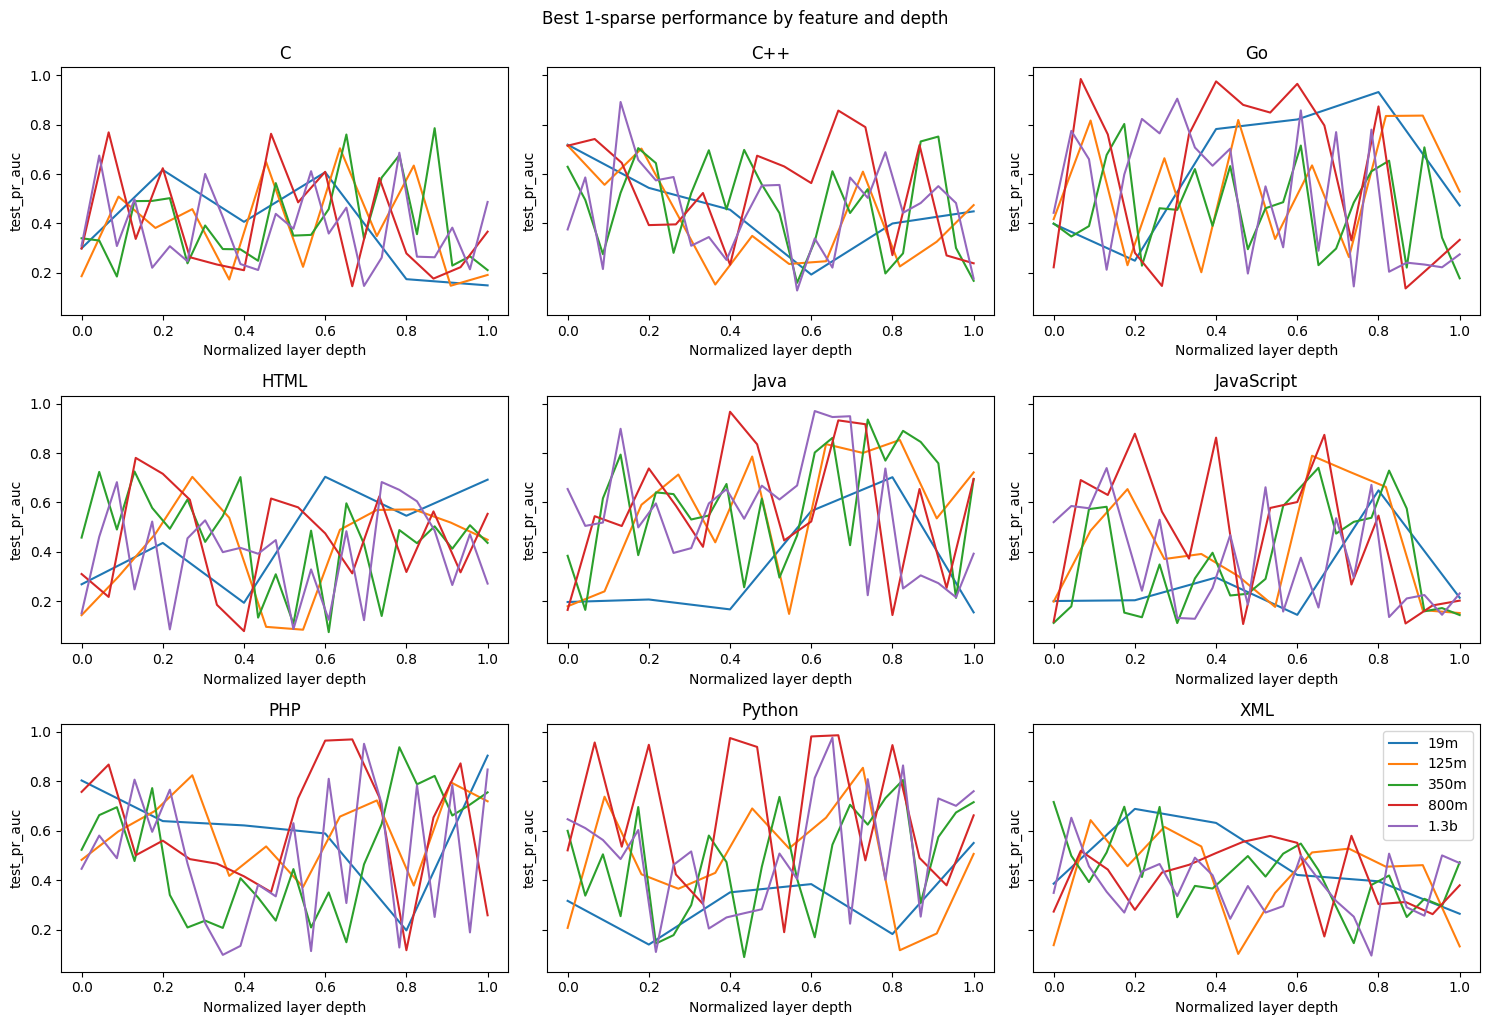

In [ ]:
plot_model_k_sparse_performance_by_feature_and_depth(rdf, 1, 'test_pr_auc')

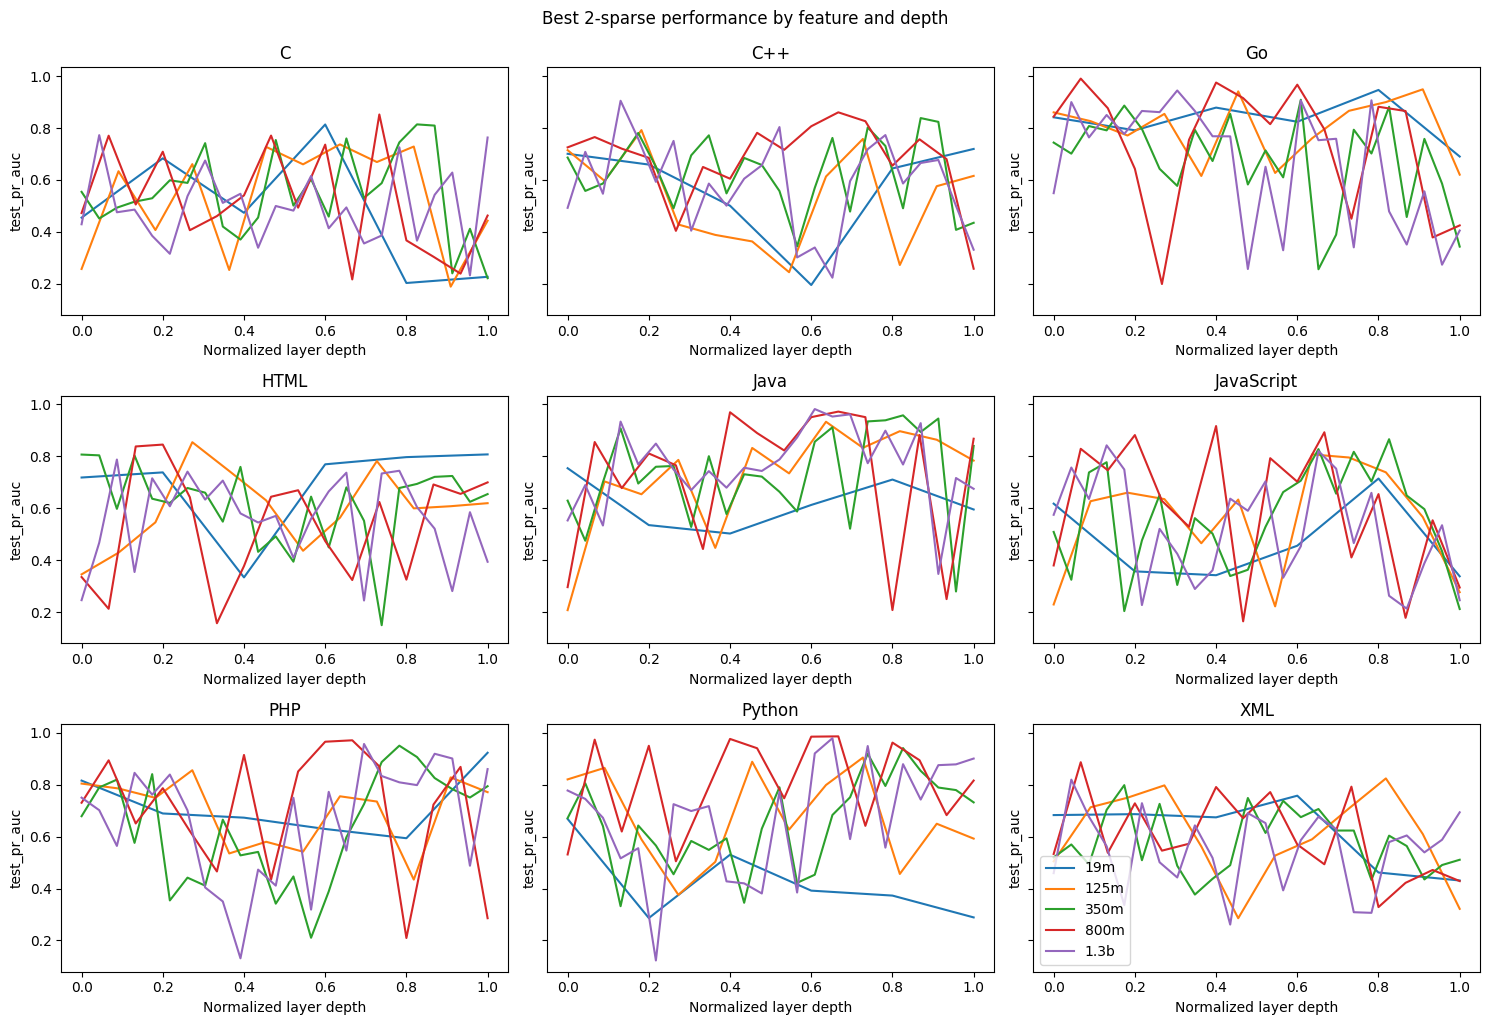

In [ ]:
plot_model_k_sparse_performance_by_feature_and_depth(rdf, 2, 'test_pr_auc')